In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
!pip install scikit-learn==0.24.2

In [73]:
df=pd.read_csv("/content/proj_1_data.csv")
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


# Dataset_info

In [74]:
df.shape

(7109, 22)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [76]:
df.isna().sum()                              # detecting null values

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [77]:
df.PRT_ID.duplicated().value_counts()               # no duplicate entries

False    7109
Name: PRT_ID, dtype: int64

In [78]:
df=df.drop(columns=["PRT_ID","REG_FEE","COMMIS"])   # drop the following columns as they are irrelevant 

# column AREA

In [79]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [80]:
df.AREA.isna().value_counts()  # no null values

False    7109
Name: AREA, dtype: int64

In [81]:
# incorrect values get corrected
df.AREA=df.AREA.replace("Karapakam","Karapakkam")
df.AREA=df.AREA.replace("Ana Nagar","Anna Nagar")
df.AREA=df.AREA.replace("Ann Nagar","Anna Nagar")
df.AREA=df.AREA.replace("Adyr","Adyar")
df.AREA=df.AREA.replace("Velchery","Velachery")
df.AREA=df.AREA.replace("Chrompt","Chrompet")
df.AREA=df.AREA.replace("Chrmpet","Chrompet")
df.AREA=df.AREA.replace("Chormpet","Chrompet")
df.AREA=df.AREA.replace("KKNagar","KK Nagar")
df.AREA=df.AREA.replace("TNagar","T Nagar")
df.AREA=df.AREA.replace("Chrompt","Chrompet")
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [82]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [83]:
df.AREA.dtype   # object type 

dtype('O')

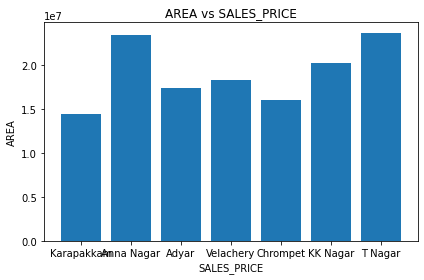

In [84]:
plt.bar(df['AREA'],df['SALES_PRICE'])
plt.title('AREA vs SALES_PRICE')
plt.xlabel('SALES_PRICE')
plt.ylabel('AREA')
plt.tight_layout()
plt.show()

The column can be arranged w.rt mean of sales_price in each area

In [85]:
area = pd.DataFrame(df.groupby('AREA')['SALES_PRICE'].mean())
area = area.sort_values(by=['SALES_PRICE'])

In [86]:
area

,SALES_PRICE
AREA,
Karapakkam,7.340100e+06
Adyar,9.185668e+06
Chrompet,1.001381e+07
Velachery,1.104735e+07
KK Nagar,1.269623e+07
Anna Nagar,1.516820e+07
T Nagar,1.561674e+07


In [87]:
fig = px.bar(area,area.index,'SALES_PRICE',color=area.index)
fig.update_layout(title='AREA vs SALES_PRICE',title_x=0.5)
fig.show()

### Encoding Area

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AREA'] = le.fit_transform(df.AREA.map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6}))


In [89]:
df.AREA.unique()

array([0, 5, 1, 3, 2, 4, 6])

## INT_SQFT

In [90]:
df.INT_SQFT.dtype            # it is a continuous value

dtype('int64')

In [91]:
df.INT_SQFT.isna().value_counts()        # no null values

False    7109
Name: INT_SQFT, dtype: int64

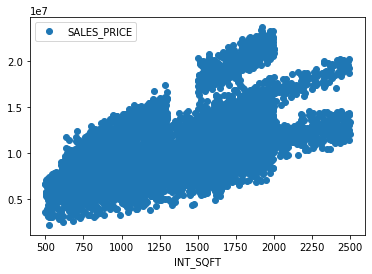

In [92]:
df.plot(x='INT_SQFT',y='SALES_PRICE',style='o')
plt.show()

The graph is not clearing showing the relationship so we are transforming to have a clear graph

In [93]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

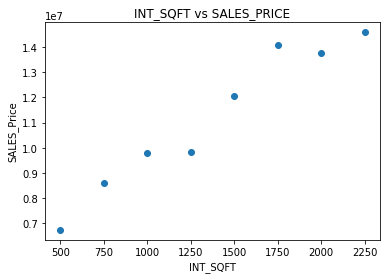

In [94]:
a = [df.loc[(df.INT_SQFT > i) & (df.INT_SQFT < (i+250)),'SALES_PRICE'].mean() for i in range(0,2500,250)]
plt.scatter(x = list(range(0,2500,250)), y = a)
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_Price')
plt.title('INT_SQFT vs SALES_PRICE')
plt.show()

The following graph shows ther is a Linear Relationship between INT_SQFT vs SALES_PRICE 

In [95]:
df[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


There is a good corelation between the feature and the target.

## DATE_SALE

In [96]:
df.DATE_SALE = df.DATE_SALE.astype('datetime64')

In [97]:
df.DATE_SALE.values

array(['2011-04-05T00:00:00.000000000', '2006-12-19T00:00:00.000000000',
       '2012-04-02T00:00:00.000000000', ...,
       '2006-08-25T00:00:00.000000000', '2009-03-08T00:00:00.000000000',
       '2005-07-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [98]:
df.DATE_SALE.dtype

dtype('<M8[ns]')

In [99]:
df.DATE_SALE.isna().sum()                       # no null values

0

## DIST_MAINROAD

In [100]:
df.DIST_MAINROAD.dtype

dtype('int64')

In [101]:
df.DIST_MAINROAD.values

array([131,  26,  70, ..., 152,  40, 156])

In [102]:
df.DIST_MAINROAD.isna().value_counts()                 # no null values

False    7109
Name: DIST_MAINROAD, dtype: int64

In [103]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [104]:
df[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


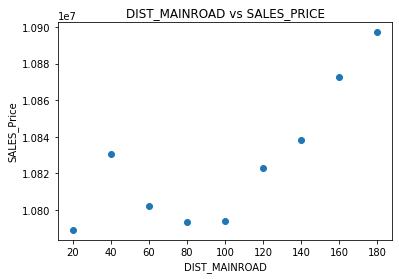

In [105]:
a = [df.loc[(df.DIST_MAINROAD > 20) & (df.DIST_MAINROAD < (i+20)),'SALES_PRICE'].mean() for i in range(0,200,20)]
plt.scatter(x = list(range(0,200,20)), y = a)
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_Price')
plt.title('DIST_MAINROAD vs SALES_PRICE')
plt.show()

## N_BEDROOM

In [106]:
df.N_BEDROOM.dtype

dtype('float64')

In [107]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [108]:
df.N_BEDROOM.isna().sum()

1

In [109]:
df=df.dropna(subset=['N_BEDROOM'])             # drop null value 

In [110]:
df.N_BEDROOM = df.N_BEDROOM.astype(int)
df.N_BEDROOM.dtype

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dtype('int64')

In [111]:
df.N_BEDROOM.value_counts()

1    3795
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [112]:
n_bedrm = pd.DataFrame(df.groupby('N_BEDROOM')['SALES_PRICE'].mean())
n_bedrm

,SALES_PRICE
N_BEDROOM,
1,9.790184e+06
2,1.181747e+07
3,1.247813e+07
4,1.445131e+07


In [113]:
fig = px.bar(n_bedrm,n_bedrm.index,'SALES_PRICE',color=n_bedrm.index)
fig.update_layout(title='N_BEDROOM vs SALES_PRICE',title_x=0.5)
fig.show()

In [114]:
df[['N_BEDROOM','SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330999
SALES_PRICE,0.330999,1.000000



## N_BATHROOM

In [115]:
df.N_BATHROOM.unique()

array([ 1.,  2., nan])

In [116]:
df=df.dropna(subset=["N_BATHROOM"])             # removed the null values

In [117]:
df.N_BATHROOM = df.N_BATHROOM.astype(int)       # changed the dtype --> int
df.N_BATHROOM.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1    5588
2    1515
Name: N_BATHROOM, dtype: int64

In [118]:
n_bathrm = pd.DataFrame(df.groupby('N_BATHROOM')['SALES_PRICE'].mean())
n_bathrm

,SALES_PRICE
N_BATHROOM,
1,1.068107e+07
2,1.168299e+07


In [119]:
fig = px.bar(n_bathrm,n_bathrm.index,'SALES_PRICE',color=n_bathrm.index)
fig.update_layout(title='N_BATHROOM vs SALES_PRICE',title_x=0.5)
fig.show()

In [120]:
df[['N_BATHROOM','SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108884
SALES_PRICE,0.108884,1.000000


There is no significant corelation between N_BATHROOM and SALES_PRICE

## N_ROOM

In [121]:
df.N_ROOM.unique()              

array([3, 5, 4, 2, 6])

In [122]:
df.N_ROOM.isna().value_counts()               # no null values, dtype is ok

False    7103
Name: N_ROOM, dtype: int64

In [123]:
df.N_ROOM.value_counts()             

4    2561
3    2122
5    1245
2     921
6     254
Name: N_ROOM, dtype: int64

In [124]:
n_room = pd.DataFrame(df.groupby('N_ROOM')['SALES_PRICE'].mean())
n_room

,SALES_PRICE
N_ROOM,
2,6.982718e+06
3,9.298872e+06
4,1.169158e+07
5,1.414420e+07
6,1.445131e+07


In [125]:
fig = px.bar(n_room,n_room.index,'SALES_PRICE',color = n_room.index)
fig.update_layout(title = 'N_ROOM vs SALES_PRICE',title_x = 0.5)
fig.show()

In [126]:
df[['N_ROOM','SALES_PRICE']].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.000000,0.602637
SALES_PRICE,0.602637,1.000000


There is a good corelation between N_ROOM and SALES_PRICE

## SALE_COND

In [127]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [128]:
df.SALE_COND = df.SALE_COND.replace('Ab Normal','AbNormal')        # corrected the spelling
df.SALE_COND = df.SALE_COND.replace('Partiall','Partial')
df.SALE_COND = df.SALE_COND.replace('Adj Land','AdjLand')
df.SALE_COND = df.SALE_COND.replace('PartiaLl','Partial')

In [129]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1430
Normal Sale    1422
AbNormal       1410
Family         1402
Name: SALE_COND, dtype: int64

In [130]:
df.SALE_COND.isna().value_counts()           # no null values

False    7103
Name: SALE_COND, dtype: int64

In [131]:
fig = px.pie(df,values = 'SALES_PRICE',names = 'SALE_COND')
fig.update_layout(title = 'SALE_COND vs SALES_PRICE',title_x = 0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The chart shows the value of each SALE_COND w.r.t SALES_PRICE. All the SALE_COND types are holding equal importance in terms of SALES_PRICE.

In [132]:
sale_cond = pd.DataFrame(df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values())
sale_cond

,SALES_PRICE
SALE_COND,
Partial,1.061676e+07
Family,1.073298e+07
AbNormal,1.091482e+07
Normal Sale,1.099569e+07
AdjLand,1.120931e+07


In [133]:
fig = px.bar(sale_cond,sale_cond.index,'SALES_PRICE',color=sale_cond.index)
fig.update_layout(title = 'SALE_COND vs SALES_PRICE',title_x = 0.5)
fig.show()

### Encoding SALE_COND

The SALE_COND column is encoded w.r.t to the SALES_PRICE

In [134]:
df['SALE_COND'] = le.fit_transform(df.SALE_COND.map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4}))

# **PARK_FACIL**

In [135]:
df.PARK_FACIL.values

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [136]:
df.PARK_FACIL.isna().sum()                  # no null values

0

In [137]:
df.PARK_FACIL.value_counts()

Yes    3584
No     3517
Noo       2
Name: PARK_FACIL, dtype: int64

In [138]:
df['PARK_FACIL']=df['PARK_FACIL'].replace('Noo','No')

In [139]:
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':1,'No':0})         # the column has been encoded into binary data

In [140]:
fig = px.bar(df,'PARK_FACIL','SALES_PRICE',color = 'PARK_FACIL')
fig.update_layout(title = 'PARK_FACIL vs SALES_PRICE',title_x = 0.5)
fig.show()

With increase in PARK_FACIL, SALES_PRICE increases.

# **DATE_BUILD**

In [141]:
df.DATE_BUILD.values

array(['15-05-1967', '22-12-1995', '09-02-1992', ..., '01-09-1978',
       '11-08-1977', '24-07-1961'], dtype=object)

In [142]:
df['DATE_BUILD'] = df['DATE_BUILD'].astype("datetime64")      # dtype corrected to datetime object

In [143]:
df.DATE_BUILD.isna().value_counts()             # no null values

False    7103
Name: DATE_BUILD, dtype: int64

# **BUILD_AGE**

In [144]:
df['DATE_BUILD'] = df['DATE_BUILD'].astype("datetime64")
df['BUILD_AGE']=df['DATE_SALE'].dt.year.sub(df['DATE_BUILD'].dt.year,axis=0)

In [145]:
df.loc[df['BUILD_AGE'].isna()]                # no null values

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE


In [146]:
df.BUILD_AGE

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: BUILD_AGE, Length: 7103, dtype: int64

In [147]:
df.BUILD_AGE.describe()

count    7103.000000
mean       24.271153
std        12.334273
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: BUILD_AGE, dtype: float64

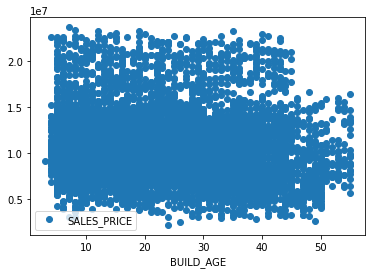

In [148]:
df.plot(x = 'BUILD_AGE',y = 'SALES_PRICE',style ='o')
plt.show()

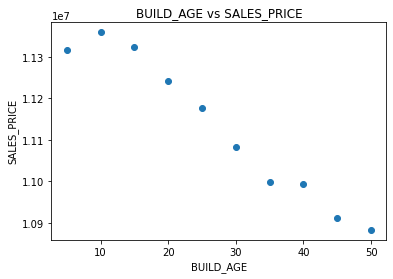

In [149]:
a = [df.loc[(df.BUILD_AGE > 5) & (df.BUILD_AGE < (i+5)),'SALES_PRICE'].mean() for i in range(0,55,5)]
plt.scatter(x = list(range(0,55,5)), y = a)
plt.xlabel('BUILD_AGE')
plt.ylabel('SALES_PRICE')
plt.title('BUILD_AGE vs SALES_PRICE')
plt.show()

In [150]:
df[['BUILD_AGE','SALES_PRICE']].corr()

,BUILD_AGE,SALES_PRICE
BUILD_AGE,1.000000,-0.118644
SALES_PRICE,-0.118644,1.000000


With increase in the age of the building the SALES_PRICE decreases.

# **BUILDTYPE**

In [151]:
df.BUILDTYPE.dtype

dtype('O')

In [152]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [153]:
df.BUILDTYPE = df.BUILDTYPE.replace('Comercial','Commercial')
df.BUILDTYPE = df.BUILDTYPE.replace('Other','Others')

In [154]:
df.BUILDTYPE.value_counts()

House         2443
Others        2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [155]:
fig = px.histogram(df.BUILDTYPE,color = df.BUILDTYPE)
fig.update_layout(xaxis_title = 'BUILDTYPE', title = 'Count of different BUILDTYPES',title_x = 0.5)
fig.show()

Maximum No. of Houses present followed by other buildings and a bit low No. of Commercial bulidings

In [156]:
b_type = pd.DataFrame(df.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values())
fig = px.bar(x = b_type.index, y = b_type.SALES_PRICE, color = b_type.index)
fig.update_layout(xaxis_title = 'BUILDTYPE',yaxis_title = 'AVG_SALES_PRICE', title = 'BUILDTYPE vs AVG_SALES_PRICE', title_x = 0.5)
fig.show()

The Price of Commercial buildings were high in Chennai comparing the Other buildings and Houses. 

Hence Commercial buildings can be considered over Houses and Other buildings.

### Encoding BUILDTYPE

In [157]:
df['BUILDTYPE'] = le.fit_transform(df.BUILDTYPE.map({'House':0,'Others':1,'Commercial':2}))

# **UTILITY_AVAIL**

In [158]:
df.UTILITY_AVAIL.dtype

dtype('O')

In [159]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [160]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace('All Pub','AllPub')      # corrected spelling
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace('NoSewr ','NoSeWa')

In [161]:
df.UTILITY_AVAIL.value_counts()

NoSeWa    3696
AllPub    1886
ELO       1521
Name: UTILITY_AVAIL, dtype: int64

In [162]:
df.UTILITY_AVAIL.isna().value_counts()               # no null values

False    7103
Name: UTILITY_AVAIL, dtype: int64

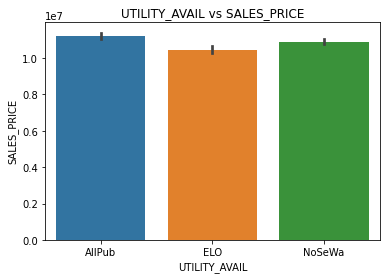

In [163]:
sns.barplot(x = 'UTILITY_AVAIL',y = 'SALES_PRICE',data = df)
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.show()

In [164]:
b_type = pd.DataFrame(df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values())
fig = px.bar(x = b_type.index, y = b_type.SALES_PRICE, color = b_type.index)
fig.update_layout(xaxis_title = 'UTILITY_AVAIL',yaxis_title = 'AVG_SALES_PRICE', title = 'UTILITY_AVAIL vs AVG_SALES_PRICE', title_x = 0.5)
fig.show()

In [165]:
fig = px.histogram(x = df['UTILITY_AVAIL'], color = df['UTILITY_AVAIL'], title = 'Count of different UTILITY_AVAIL')
fig.update_layout(title = 'Count of UTILITY_AVAIL')
fig.show()

AllPub type has high price comparing the other utilities available. But the count of AllPub is comparitively low. The builders shall consider buildings with more AllPub facility. 

In [166]:
df['UTILITY_AVAIL'] = le.fit_transform(df.UTILITY_AVAIL.map({'ELO' : 0,'AllPub' : 1,'NoSeWa' : 2}))

# **STREET**

In [167]:
df.STREET.dtype

dtype('O')

In [168]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [169]:
df.STREET = df.STREET.replace('Pavd','Paved')                   # spelling correction
df.STREET = df.STREET.replace('No Access','NoAccess')
df.STREET.value_counts()

Paved       2570
Gravel      2518
NoAccess    2015
Name: STREET, dtype: int64

In [170]:
df.STREET.isna().value_counts()            # no null values

False    7103
Name: STREET, dtype: int64

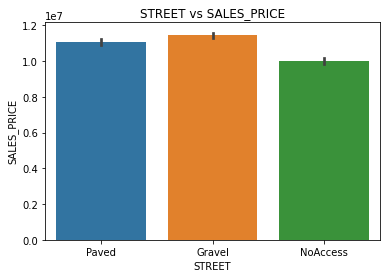

In [171]:
sns.barplot(x = 'STREET', y = 'SALES_PRICE', data = df)
plt.title("STREET vs SALES_PRICE")
plt.show()

In [172]:
fig = px.histogram(x = df['STREET'], color = df['STREET'])
fig.update_layout(xaxis_title = 'STREET', title = 'Count of different STREETS',title_x = 0.5)
fig.show()

The number of Paved Streets are higher in comparing Gravel folllowed by No Access.

In [173]:
b_type = pd.DataFrame(df.groupby('STREET')['SALES_PRICE'].mean().sort_values())
fig = px.bar(x = b_type.index, y = b_type.SALES_PRICE, color = b_type.index)
fig.update_layout(xaxis_title = 'STREET', yaxis_title = 'AVG_SALES_PRICE', title = 'STREET vs AVG_SALES_PRICE',title_x = 0.5)
fig.show()

The price of Gravel street is higher followed by Paved and lastly NoAccess.

The builders shall consider Gravel streets over other types.

In [174]:
df['STREET'] = le.fit_transform(df.STREET.map({'NoAccess':0,'Paved':1,'Gravel':2}))

# **MZZONE**

In [175]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [176]:
df.MZZONE.isna().value_counts()                    # no null values

False    7103
Name: MZZONE, dtype: int64

In [177]:
df.MZZONE.value_counts()

RL    1856
RH    1822
RM    1813
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [178]:
mzzone = pd.DataFrame(df['MZZONE'].value_counts().sort_values())

In [179]:
mzzone

,MZZONE
I,525
A,537
C,550
RM,1813
RH,1822
RL,1856


In [180]:
fig = px.bar(x = mzzone.index,y = mzzone.MZZONE, color = mzzone.index)
fig.update_layout(xaxis_title = 'MZZONE', title = 'Count of different MZZONE', title_x = 0.5)
fig.show()

In [181]:
avg = pd.DataFrame(df.groupby('MZZONE')['SALES_PRICE'].mean().sort_values())
fig = px.bar(x = avg.index, y = avg.SALES_PRICE, color = avg.index)
fig.update_layout(xaxis_title = 'MZZONE', yaxis_title = 'AVG_SALES_PRICE', title = 'MZZONE vs AVG_SALES_PRICE', title_x = 0.5)
fig.show()

In [182]:
df['MZZONE'] = le.fit_transform(df.MZZONE.map({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}))

In [183]:
df[['MZZONE','SALES_PRICE']].corr()

,MZZONE,SALES_PRICE
MZZONE,1.000000,0.427968
SALES_PRICE,0.427968,1.000000


# **QS_ROOMS**

In [184]:
df.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [185]:
df.QS_ROOMS.dtype

dtype('float64')

In [186]:
df.QS_ROOMS.isna().value_counts()              # no null values

False    7103
Name: QS_ROOMS, dtype: int64

In [187]:
df.QS_ROOMS.describe()

count    7103.000000
mean        3.517753
std         0.891931
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

In [188]:
qs_room = pd.DataFrame(df.groupby('QS_ROOMS')['SALES_PRICE'].mean().sort_values())
qs_room['QS_ROOM'] = qs_room.index

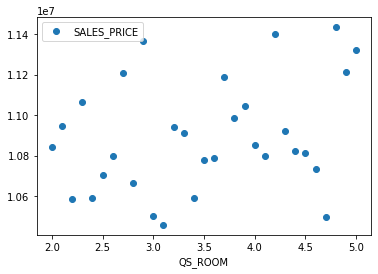

In [189]:
qs_room.plot(x = 'QS_ROOM', y = 'SALES_PRICE', style = 'o')
plt.show()

# **QS_BATHROOM**

In [190]:
df.QS_BATHROOM.unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [191]:
df.QS_BATHROOM.value_counts()

2.7    255
4.8    255
3.7    250
4.7    247
4.9    245
3.0    241
4.2    236
4.6    234
3.4    234
2.2    234
4.0    232
2.5    232
3.1    232
4.5    231
2.4    230
2.9    228
3.3    227
3.2    226
2.6    226
2.1    224
4.3    224
3.5    223
2.0    222
3.6    221
2.3    220
4.4    219
5.0    219
3.9    211
4.1    210
3.8    209
2.8    206
Name: QS_BATHROOM, dtype: int64

In [192]:
df.QS_BATHROOM.isna().value_counts()                 # no null values

False    7103
Name: QS_BATHROOM, dtype: int64

In [193]:
df.QS_BATHROOM.dtype

dtype('float64')

In [194]:
qs_bathroom = pd.DataFrame(df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().sort_values())
qs_bathroom['QS_BATHROOM'] = qs_bathroom.index

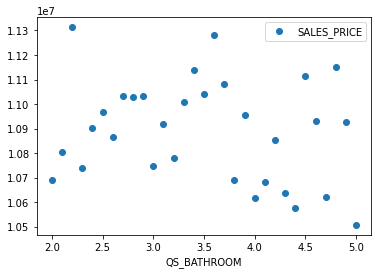

In [195]:
qs_bathroom.plot(x = 'QS_BATHROOM', y = 'SALES_PRICE', style = 'o')
plt.show()

# **QS_BEDROOM**

In [196]:
df.QS_BEDROOM.dtype

dtype('float64')

In [197]:
df.QS_BEDROOM.unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [198]:
df.QS_BEDROOM.isna().value_counts()              # no null values

False    7103
Name: QS_BEDROOM, dtype: int64

In [199]:
df.QS_BEDROOM.describe()

count    7103.000000
mean        3.485513
std         0.887067
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

# **QS_OVERALL**

In [200]:
df.QS_OVERALL.values

array([4.33 , 3.765, 3.09 , ..., 3.84 , 4.16 , 3.64 ])

In [201]:
df.QS_OVERALL.isna().value_counts()            #  null values found

False    7056
True       47
Name: QS_OVERALL, dtype: int64

In [202]:
df = df.dropna(subset=['QS_OVERALL'])         # removed the null values

In [203]:
df.QS_OVERALL.dtype

dtype('float64')

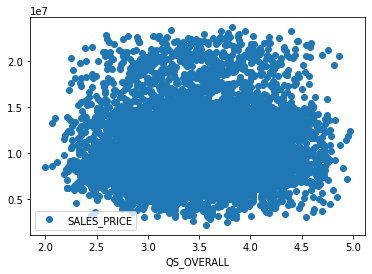

In [204]:
df.plot(x = 'QS_OVERALL', y = 'SALES_PRICE', style = 'o')
plt.show()

In [205]:
df.QS_OVERALL.describe()

count    7056.000000
mean        3.503389
std         0.527313
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

# **SALES_PRICE**

In [206]:
df.SALES_PRICE.dtype

dtype('int64')

In [207]:
df.SALES_PRICE.isna().value_counts()                 # no null values

False    7056
Name: SALES_PRICE, dtype: int64

In [208]:
df.SALES_PRICE.describe()

count    7.056000e+03
mean     1.088801e+07
std      3.769081e+06
min      2.156875e+06
25%      8.266790e+06
50%      1.031922e+07
75%      1.298148e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [209]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_AGE
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,2,1,1,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,2,1,2,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,2,0,2,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,1,2,1,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,1,1,2,1,3.0,2.5,4.1,3.290,7406250,30


In [210]:
df.shape

(7056, 20)

In [211]:
df['PRICE'] = df['SALES_PRICE']
df = df.drop(columns = ['DATE_SALE','DATE_BUILD','SALES_PRICE'])
df_mod = df.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **LINEAR REGRESSION**

In [212]:
x = df_mod.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = df_mod.iloc[:, -1].values # target as arrays
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 150)

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [214]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(x_train, y_train)

LinearRegression()

In [215]:
column = list(df_mod.columns.values)
column.remove('PRICE')

In [216]:
co_eff = pd.DataFrame(le.coef_,column, columns = ['co_eff'])
co_eff = co_eff.sort_values('co_eff',ascending = False)
y_pred = le.predict(x_test)

In [217]:
co_eff

,co_eff
BUILDTYPE,1.899381e+06
N_ROOM,1.738455e+06
AREA,1.065821e+06
MZZONE,8.871937e+05
INT_SQFT,6.620481e+05
PARK_FACIL,5.042684e+05
STREET,3.971214e+05
SALE_COND,2.111427e+05
QS_OVERALL,1.499375e+05
N_BATHROOM,1.056306e+05


In [218]:
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
res

,Actual,Predicted
0,7603375,8.073432e+06
1,12858080,1.034769e+07
2,5425250,3.700377e+06
3,4606500,4.456812e+06
4,8844000,9.699888e+06
...,...,...
1407,18055240,1.673175e+07
1408,3741250,4.313915e+06
1409,9422000,1.038018e+07
1410,9817500,9.282082e+06


In [219]:
from sklearn import metrics
Lin_Reg_r2 = metrics.r2_score(y_test, y_pred)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8800656570770987


In [220]:
from sklearn.feature_selection import RFE
le = LinearRegression()
selector = RFE(le, n_features_to_select=5, step=1)
selector = selector.fit(x_train, y_train)
list(zip(column,selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('BUILD_AGE', False)]

In [221]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(le, n_features_to_select=5)
sfs.fit(x_train, y_train)
list(zip(column,selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('BUILD_AGE', False)]

In [222]:
from sklearn.model_selection import cross_validate
le = LinearRegression()
cv_results = cross_validate(le, x_train, y_train, cv=10, scoring = "r2")
Lin_Reg_cv = cv_results['test_score'].mean()
Lin_Reg_cv

0.8814854293588187

# **Decision Tree**

In [223]:
x = df_mod.iloc[:,:-1].values
y = df_mod.iloc[:,-1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 150)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [224]:
x_test

array([[-1.37115903, -1.24862583, -0.55597601, ...,  0.68376881,
         0.39291124, -1.39806072],
       [-0.82490212, -0.22796136, -0.29566925, ..., -0.66705504,
        -0.06173248, -0.99175738],
       [-1.37115903, -1.67081966,  1.10998727, ..., -0.77962369,
        -1.04679386,  0.71471666],
       ...,
       [-1.37115903, -0.2410189 ,  1.24881754, ...,  0.00835689,
        -0.74369805, -0.99175738],
       [-0.27864522, -0.9374211 ,  0.98851078, ..., -0.44191773,
         0.99910286,  1.12102001],
       [ 1.36012549,  1.31500475, -1.04188197, ...,  0.12092554,
        -0.00490201,  0.22715265]])

In [225]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.predict(x_test)

array([ 7101750., 11881010.,  6518000., ..., 10024000., 10978335.,
       11505040.])

In [226]:
from sklearn.metrics import r2_score
y_pred = dt.predict(x_test)
r2 = r2_score(y_test,y_pred)
print("R2 value for DT: ",r2)

R2 value for DT:  0.9657263056268506


In [227]:
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,60,65]:
  dt = DecisionTreeRegressor(max_depth = depth)
  dt.fit(x_train,y_train)
  y_pred = dt.predict(x_test)
  trainAccuracy = r2_score(y_test,y_pred)
  dt = DecisionTreeRegressor(max_depth = depth)
  testAccuracy = cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'r2')
  print(depth, trainAccuracy, np.mean(testAccuracy))

1 0.3609807701797364 0.3592642864413872
2 0.6898467900301422 0.6822097765048343
3 0.8179024811803217 0.7964324987964633
4 0.8919480212728985 0.8810396646449702
5 0.9233996548692299 0.913493346776081
6 0.9415338475912632 0.935042784626623
7 0.952521365413595 0.9501073236985318
8 0.962170099094975 0.9590906944196153
9 0.9677343840884254 0.9637006058893766
10 0.9682678989267085 0.9654302139489562
20 0.9642989840173489 0.9628267513342885
30 0.9652305297203743 0.9626937873541707
40 0.9651924557782671 0.9631834518299321
60 0.965781779367491 0.9630385292552818
65 0.9648309938452645 0.9632741319770725


In [228]:
dt = DecisionTreeRegressor(max_depth = 10)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
Dt_r2 = r2_score(y_test,y_pred)

dt = DecisionTreeRegressor(max_depth = 10)
Dt_cv = np.mean(cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'r2'))
print(f'R2 value : {Dt_r2} cross validation score : {Dt_cv}')

R2 value : 0.9685923935898343 cross validation score : 0.9657539361859449


In [229]:
dt = DecisionTreeRegressor(max_depth = 10)
dt.fit(x_train,y_train)
importance = dt.feature_importances_


In [230]:
feature_importance = pd.DataFrame(column, columns = ['Factors'])
feature_importance['Importance'] = importance
feature_importance.sort_values('Importance',axis = 0, ascending =False)

,Factors,Importance
0,AREA,0.483922
8,BUILDTYPE,0.330056
1,INT_SQFT,0.111780
11,MZZONE,0.040142
7,PARK_FACIL,0.016474
10,STREET,0.010500
16,BUILD_AGE,0.002312
6,SALE_COND,0.001168
12,QS_ROOMS,0.000787
14,QS_BEDROOM,0.000605


In [231]:
from sklearn.feature_selection import RFE
dt = DecisionTreeRegressor(max_depth = 10)
selector = RFE(dt, n_features_to_select=5, step=1)
selector = selector.fit(x_train, y_train)
list(zip(column,selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', True),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('BUILD_AGE', False)]

In [232]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(dt, n_features_to_select=5)
sfs.fit(x_train, y_train)
list(zip(column,selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', True),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('BUILD_AGE', False)]

# **XG Boosting**

In [233]:
import warnings 
warnings.filterwarnings('ignore')

In [234]:
import xgboost as xgb
for lr in [0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1.0,1.01,1.02,1.03,1.04,1.05,1.1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators = 100, verbosity = 0)
  model.fit(x_train, y_train)
  r2_score = model.score(x_test, y_test)
  print(f' Learning_rate :{lr}, R2 Score : {r2_score}, Cross_val : {np.mean(cross_val_score(model, x_train, y_train, cv = 10))} ')

 Learning_rate :0.02, R2 Score : 0.745125817390959, Cross_val : 0.7419119630738127 
 Learning_rate :0.03, R2 Score : 0.9233907654255396, Cross_val : 0.9215148138445335 
 Learning_rate :0.04, R2 Score : 0.9608803450099185, Cross_val : 0.9594130664570277 
 Learning_rate :0.05, R2 Score : 0.9732407184714051, Cross_val : 0.9719184806382524 
 Learning_rate :0.06, R2 Score : 0.9795346631849157, Cross_val : 0.978145592883321 
 Learning_rate :0.07, R2 Score : 0.9837929077820502, Cross_val : 0.9828172770013005 
 Learning_rate :0.08, R2 Score : 0.9868379380392902, Cross_val : 0.9860047287777354 
 Learning_rate :0.09, R2 Score : 0.9893437153166214, Cross_val : 0.9887255790244953 
 Learning_rate :0.1, R2 Score : 0.9910659851252992, Cross_val : 0.9902460327607278 
 Learning_rate :0.2, R2 Score : 0.9954930407553177, Cross_val : 0.9953790694708259 
 Learning_rate :0.3, R2 Score : 0.9963380870929247, Cross_val : 0.9956312544533423 
 Learning_rate :0.4, R2 Score : 0.9966998389173518, Cross_val : 0.9956

In [235]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators = 100, verbosity = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
XGB_r2 = model.score(x_test, y_test)
XGB_cv = np.mean(cross_val_score(model, x_train, y_train, cv = 10))
print(f' R2_score : {XGB_r2}, Cross_validation_score : {XGB_cv}')

 R2_score : 0.9964957621871102, Cross_validation_score : 0.9960541126248605


In [236]:
from sklearn.feature_selection import RFE
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimator = 100, verbosity = 0)
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(x_train, y_train)
list(zip(column,selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', True),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('BUILD_AGE', False)]

In [237]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(x_train, y_train)
list(zip(column,selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', True),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('BUILD_AGE', False)]

The important features are AREA, INT_SQFT, PARK_FACIL, BUILD_TYPE, MZZONE

In [238]:
R2_score = [Lin_Reg_r2,Dt_r2,XGB_r2]
Cross_val = [Lin_Reg_cv,Dt_cv, XGB_cv]
data = { 'R2_score': R2_score, 'Cross_val_score': Cross_val}
result = pd.DataFrame(data, index = ['Linear_Reg','Decission_tree','XGB'])
result

,R2_score,Cross_val_score
Linear_Reg,0.880066,0.881485
Decission_tree,0.968592,0.965754
XGB,0.996496,0.996054


The above table shows **XGB** modelling is providing best Cross validation score and R2_score. Hence we choose XGB modelling.

XGB considers **AREA, INT_SQFT, PARK_FACIL, BUILD_TYPE,** and **MZZONE** as 5 most important features.

In [307]:
def get_val():
  print({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
  area = int(input('Enter the Area Code : '))
  size = int(input('Enter the Int_Sqft : '))
  distance = int(input('Enter the Distance from main road : '))
  bedroom = int(input('Enter the Number of Bedrooms : '))
  bathroom = int(input('Enter the Number of Bathrooms : '))
  room = int(input('Enter the Number of Rooms : '))
  print({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
  sale_cond = int(input('Enter the Sale condition Code : '))
  print({'Yes':1,'No':0})
  parking = int(input('Enter the Parking Facility Code : '))
  print({'House':0,'Others':1,'Commercial':2})
  build_type = int(input('Enter the Buiilding type Code : '))
  print({'ELO':0,'AllPub':1,'NoSeWa':2})
  utility = int(input('Enter the Utilities available Code : '))
  print({'NoAccess':0,'Paved':1,'Gravel':2})
  street = int(input('Enter the Street type Code : '))
  print({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})
  mzzone = int(input('Enter the MZ ZONE Code : '))
  qs_room = float(input('Enter the QS_ROOMS : '))
  qs_bathroom = float(input('Enter the QS_BATHROOMS : '))
  qs_bedroom = float(input('Enter the QS_BEDROOMS : '))
  qs_overall = float(input('Enter the QS_OVERALL : '))
  build_date = input('Enter the Build date :  ')
  build_sale = input('Enter the Sale date : ')
  val = [area,size,distance,bedroom,bathroom,room,sale_cond,parking,build_type,utility,street,mzzone,qs_room,qs_bathroom,qs_bedroom,qs_overall,build_date,build_sale]
  col = ['AREA','INT_SQFT','DIST_MAIN','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARKING','BUILD_TYPE','UTILITY','STREET','MZZONE','QS_ROOM','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','DATE_BUILD','DATE_SALE']
  data = {}
  for i in range(len(col)):
    data[col[i]] = val[i]
  data1 = [data]
  Df = pd.DataFrame(data1)
  Df['DATE_BUILD'] = Df['DATE_BUILD'].astype("datetime64")
  Df['DATE_SALE'] = Df['DATE_SALE'].astype('datetime64')
  Df['BUILD_AGE']=Df['DATE_SALE'].dt.year.sub(Df['DATE_BUILD'].dt.year,axis=0)
  Df = Df.drop(columns = ['DATE_BUILD','DATE_SALE'], axis = 1)
  return Df

In [308]:
def predict():
  x = df_mod.iloc[:,:-1].values
  y = df_mod.iloc[:,-1].values
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 150)
  scaler = StandardScaler()
  scaler.fit(x_train)
  scaler.transform(x_train)
    
  model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators = 100, verbosity = 0)
  model.fit(x_train, y_train)
  Df = get_val()
  new_pred = Df.iloc[:1,:].values
  scaler.transform(new_pred)
  price = model.predict(new_pred)
  print('The Price estimated for the given data is',(price[0]))
  Df['Estimated_Price'] = price
  print(Df)

In [311]:
def new():
  while True:
    new = int(input('Enter 1 to predict : '))
    if new ==1:
      predict()
    else:
      print('Thank You !')
      break

new()